In [44]:
#Already given in assignment question.
# Importing the libraries pandas, numpy, and matplotlib:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Reading the u.data file as a DataFrame called df_ratings:
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
df_ratings = pd.read_csv('ml-100K/u.data', sep='\t', names=ratings_cols)
# Reading the u.item file as a DataFrame called df_movies:
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
df_movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', usecols=range(5),
names=movies_cols)
# Reading the u.user file as a DataFrame called df_users:
user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
df_users = pd.read_csv('ml-100k/u.user', sep='|', names=user_columns)

In [45]:
# 1: 
# In the code snippet that has already been provided in the assignment, I could see three data frames.
# They are: df_ratings, df_movies and df_users.     
# I have used info() and describe() methodds to get info about the dataframes.

print("Info for df_ratings:")
print(df_ratings.info())
print("\nDescription for df_ratings:")
print(df_ratings.describe())

print("\nInfo for df_movies:")
print(df_movies.info())
print("\nDescription for df_movies:")
print(df_movies.describe())

print("\nInfo for df_users:")
print(df_users.info())
print("\nDescription for df_users:")
print(df_users.describe())

Info for df_ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

Description for df_ratings:
            user_id       movie_id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8

In [46]:
# 2:
# I have considered the dataframes as a list and assigned it to a variable. I then wrote a for loop to iterate 
# among the three dataframes and printed the first few rows by using head() method.

data_frames = [df_ratings, df_movies, df_users]
data_frame_names = ['df_ratings', 'df_movies', 'df_users']

for df, df_name in zip(data_frames, data_frame_names):
    print(f"\nFirst few rows of {df_name}:")
    print(df.head())


First few rows of df_ratings:
   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

First few rows of df_movies:
   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...  
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...  
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...  
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...  
4  http://us.imdb.com

In [47]:
# 3:
# Printing the rows by using len() over 3 dataframes.
print("\nNumber of rows in df_ratings:", len(df_ratings))
print("Number of rows in df_movies:", len(df_movies))
print("Number of rows in df_users:", len(df_users))


Number of rows in df_ratings: 100000
Number of rows in df_movies: 1682
Number of rows in df_users: 943


In [48]:
# 4:
# unique() method helps print the unique values of rating column. And, to know the number of unique ratings, 
# we can use nunique() method.
unique_ratings = df_ratings['rating'].unique()
num_unique_ratings = df_ratings['rating'].nunique()
print("\nUnique ratings:", unique_ratings)
print("Number of unique ratings:", num_unique_ratings)


Unique ratings: [3 1 2 4 5]
Number of unique ratings: 5


In [49]:
# 5:
# Printing the number of unique values for user_id column in df_users. Since a user_id is always unique and can be assigned to 
# a single user, this number represents the total number of unique users in our dataset

num_unique_user_ids = df_users['user_id'].nunique()
print("\nNumber of unique user IDs:", num_unique_user_ids)
print("This number represents the total number of unique users in the dataset.")


Number of unique user IDs: 943
This number represents the total number of unique users in the dataset.


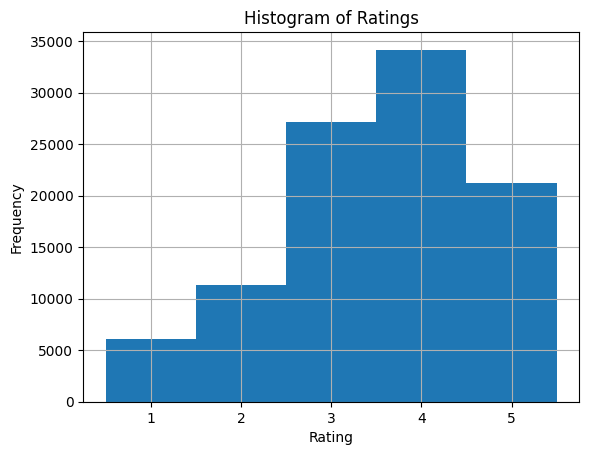

In [50]:
# 6:
# We have to find the distribution of ratings which means how many gave each of the values as ratings. I used hist() method to 
# show it
df_ratings['rating'].hist(bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], align='mid')
plt.title("Histogram of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [51]:
# 7:
# For getting the the movie that was rated the greatest number of times, we have to count the occurences of each movie ID
# and find the max value. For that, I used value_counts to count the occurences and then used idxmax to get the biggest number.
most_rated_movie = df_ratings['movie_id'].value_counts().idxmax()
print("\nThe movie rated the greatest number of times is Movie ID:", most_rated_movie)


The movie rated the greatest number of times is Movie ID: 50


In [52]:
# 8:
# To know the id of the movie that got most 5star ratings, we just have to filter for ratings equal to 5 and then count 
# the occurrences of each movie ID. Finally, we get the mvoie id that has the highest value.
most_frequent_5_rating_movie = df_ratings[df_ratings['rating'] == 5]['movie_id'].value_counts().idxmax()
print("The movie that received the most '5' rating is Movie ID:", most_frequent_5_rating_movie)

The movie that received the most '5' rating is Movie ID: 50


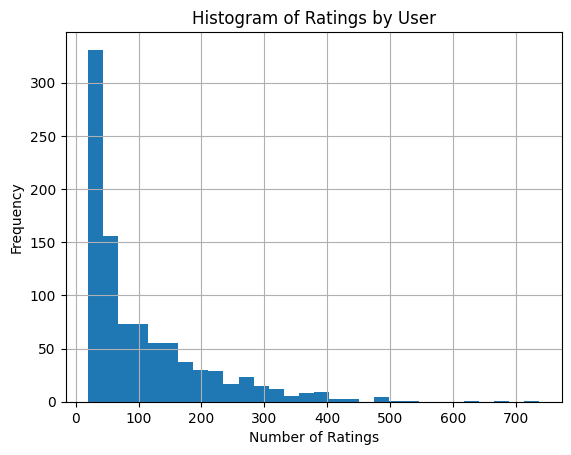

In [53]:
# 9:
# Plotted histogram using hist() method on the ocuurence of user id in the df_ratings dataframe.
user_rating_counts = df_ratings['user_id'].value_counts()
user_rating_counts.hist(bins=30)
plt.title("Histogram of Ratings by User")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()

In [54]:
# 10:
# For calculating and printing the year with the greatest number of movies released in the df_movies dataframe, I 
# converted the 'release_date' column to a datetime format and counted the occurrences of each release year.
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors='coerce')
year_with_most_releases = df_movies['release_date'].dt.year.value_counts().idxmax()
print("\nThe year with the greatest number of movies released is:", year_with_most_releases)


The year with the greatest number of movies released is: 1996.0


In [55]:
# 11:
# I have merged both rating and movies dataframes based on the 'movie_id' column.
df_combined = pd.merge(df_ratings, df_movies, on='movie_id')
print("\nSample rows from the combined DataFrame:")
print(df_combined.sample(5))


Sample rows from the combined DataFrame:
       user_id  movie_id  rating  timestamp                       title  \
70104      399       239       3  882344553             Sneakers (1992)   
54416      326       611       3  879875572                Laura (1944)   
44757       56       186       3  892676933  Blues Brothers, The (1980)   
13046      625       403       3  891961882               Batman (1989)   
47232      611       315       5  891636098            Apt Pupil (1998)   

      release_date  video_release_date  \
70104   1992-01-01                 NaN   
54416   1944-01-01                 NaN   
44757   1980-01-01                 NaN   
13046   1989-01-01                 NaN   
47232   1998-10-23                 NaN   

                                                imdb_url  
70104  http://us.imdb.com/M/title-exact?Sneakers%20(1...  
54416    http://us.imdb.com/M/title-exact?Laura%20(1944)  
44757  http://us.imdb.com/M/title-exact?Blues%20Broth...  
13046   http://us.

In [56]:
# 12:
# In the dataframe merged above, I filtered the title 'Star Wars (1977)' and printed its length.
star_wars_ratings = df_combined[df_combined['title'] == 'Star Wars (1977)']
num_ratings_star_wars = len(star_wars_ratings)
print("\nThe movie 'Star Wars (1977)' was rated", num_ratings_star_wars, "times.")


The movie 'Star Wars (1977)' was rated 583 times.


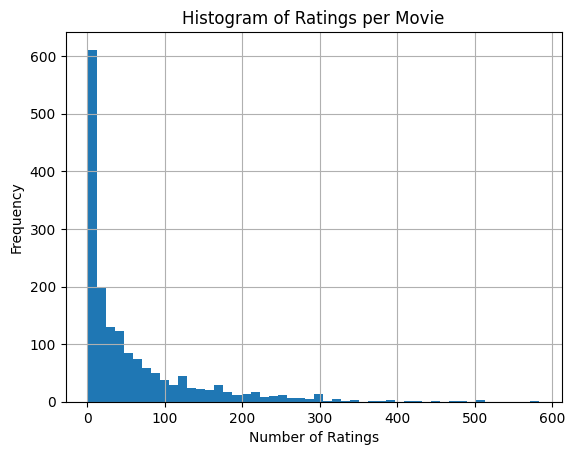

In [57]:
# 13:
# Plotted the histogram for number of ratings per movie in the merged dataframe.
movie_rating_counts = df_combined['movie_id'].value_counts()
movie_rating_counts.hist(bins=50)
plt.title("Histogram of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()

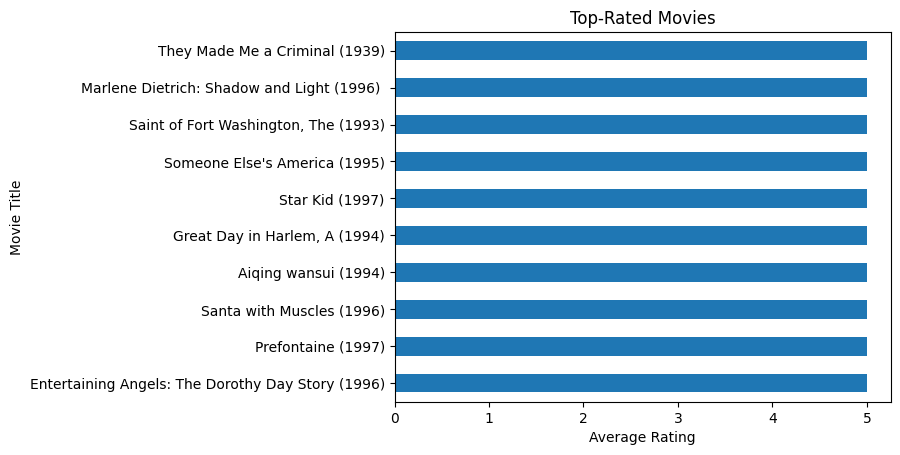

In [58]:
# 14:
# Plotting bar graph. I have grouped by title's rating and sorted the values in descending order. From that,
# I am plotting the top 10 rated movies.
top_rated_movies = df_combined.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
top_rated_movies.plot(kind='barh')
plt.title("Top-Rated Movies")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.gca().invert_yaxis()  # Reverse the order to show the highest rated movie at the top
plt.show()

In [59]:
# 15:
# For adding user information as sked, I am merging the previously combined dataframe with users dataframe. I merged it on
# 'user_id' column.
df_combined_all = pd.merge(df_combined, df_users, on='user_id')

In [60]:
# Task 16: Count the number of ratings and average rating for each movie.
# Printing number of ratings and the average of rating for each movie. I use agg() to do that after grouping them by rating and 
# title.
movie_ratings_stats = df_combined_all.groupby('title')['rating'].agg(['count', 'mean'])
print("\nNumber of ratings and average rating for each movie:")
print(movie_ratings_stats)


Number of ratings and average rating for each movie:
                                       count      mean
title                                                 
'Til There Was You (1997)                  9  2.333333
1-900 (1994)                               5  2.600000
101 Dalmatians (1996)                    109  2.908257
12 Angry Men (1957)                      125  4.344000
187 (1997)                                41  3.024390
...                                      ...       ...
Young Guns II (1990)                      44  2.772727
Young Poisoner's Handbook, The (1995)     41  3.341463
Zeus and Roxanne (1997)                    6  2.166667
unknown                                    9  3.444444
Á köldum klaka (Cold Fever) (1994)         1  3.000000

[1664 rows x 2 columns]


In [61]:
# 17:
# here, I am printing the top-rated movies that have a minimum rating count of 100.
top_rated_popular_movies = movie_ratings_stats[movie_ratings_stats['count'] >= 100].sort_values(by='mean', ascending=False)
print("\nTop-rated movies with a minimum rating count of 100:")
print(top_rated_popular_movies)


Top-rated movies with a minimum rating count of 100:
                                  count      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230
...                                 ...       ...
Spawn (1997)                        143  2.615385
Event Horizon (1997)                127  2.574803
Crash (1996)                        128  2.546875
Jungle2Jungle (1997)                132  2.439394
Cable Guy, The (1996)               106  2.339623

[338 rows x 2 columns]


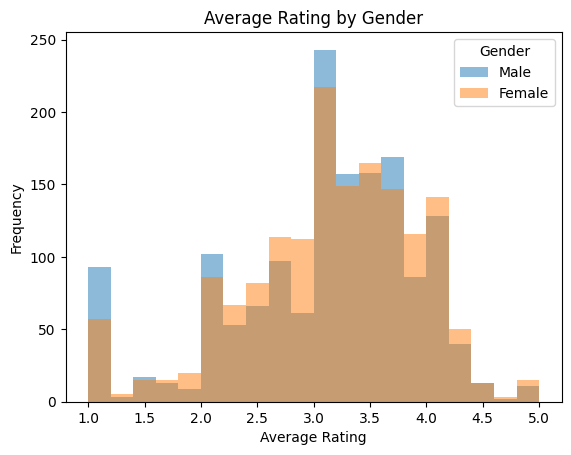

In [62]:
# 18:
# Created a histogram that has both Male and Female. Then, I visualize the averge rating per movie by gender.
average_rating_by_gender = df_combined_all.groupby(['title', 'gender'])['rating'].mean().unstack()
average_rating_by_gender.plot(kind='hist', alpha=0.5, bins=20, title="Average Rating by Gender")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.legend(title="Gender", labels=["Male", "Female"])
plt.show()

In [63]:
# 19:
# Printing number of people in each ocupation in descending order.
occupation_counts = df_combined_all['occupation'].value_counts()
print("\nNumber of people in each occupation (descending order):")
print(occupation_counts)


Number of people in each occupation (descending order):
occupation
student          21957
other            10663
educator          9442
engineer          8175
programmer        7801
administrator     7479
writer            5536
librarian         5273
technician        3506
executive         3403
healthcare        2804
artist            2308
entertainment     2095
scientist         2058
marketing         1950
retired           1609
lawyer            1345
none               901
salesman           856
doctor             540
homemaker          299
Name: count, dtype: int64


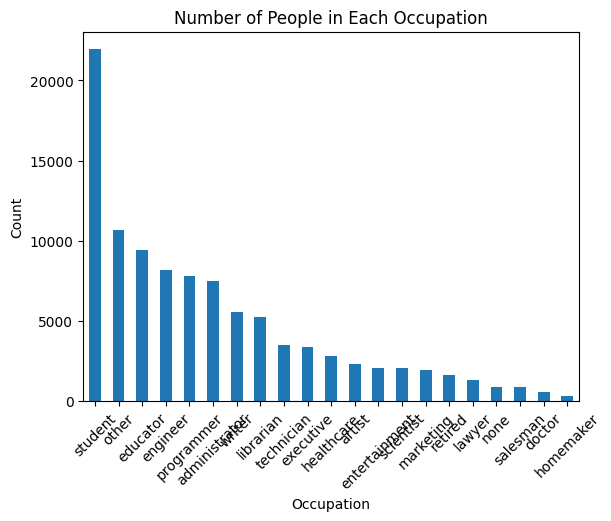

In [64]:
# 20: 
# Plotting a bar chart of all occupations.
occupation_counts.plot(kind='bar', title="Number of People in Each Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

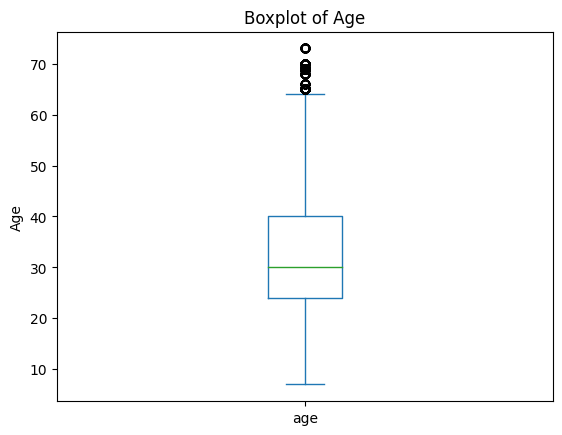

In [65]:
# 21: 
# Showing a boxplot for age by using box a value for paramter 'kind'.
df_combined_all['age'].plot(kind='box', title="Boxplot of Age")
plt.ylabel("Age")
plt.show()